Bhavesh Ahluwalia #23500449


# CS381 Data Analytics Final Project


### Due on 12/11/2019 23:59 pm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Dataset is based on an census income data
https://archive.ics.uci.edu/ml/datasets/census+income


Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. 


Attribute Information:

Listing of attributes:

* The last column >50K, <=50K is the target variable indicating whether the people earn less than or larger than 50K per year

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



### However, I have modified the dataset and so you will need to load the dataset by reading a csv file I provided. In particular, I changed 50K to 80K just to reflect the inflation 

In [4]:
df = pd.read_csv("adult_income2.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=80K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=80K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=80K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=80K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=80K


### Your task is to build a model that can predict whether a people will earn <= 80K or > 80K

* Use any one of the models (Logistic, SVM, Decision Tree and Random Forecast) that we have covered in class.
* Do not use any models that we have not covered in class.
*
* The best performance model will have an extra 5 points, but the whole project will still be capped at 20 points for the whole final project
* The second and third performance model with have 2 extra points capped at 20 points for the whole final project.




### Make sure your work include the following steps

* EDA (chekcing missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least two models and checked their model performance
* performed cross-validations


First change the target variable salary to 0 and 1

In [5]:
df['salary'] = df['salary'].apply(lambda x: 0 if x == '<=80K' else 1)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


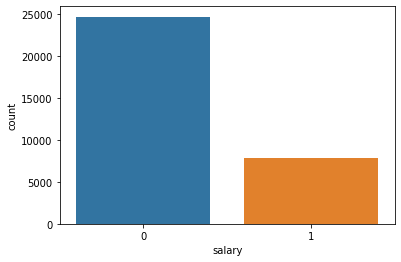

In [6]:
sns.countplot(df['salary'])

### Good Luck !!!

Show all your work below

this = df

# EDA:(chekcing missing values, removing outliers) 

In [7]:
print(df.shape)

(32570, 15)


In [8]:
df.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
salary            False
dtype: bool

In [9]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


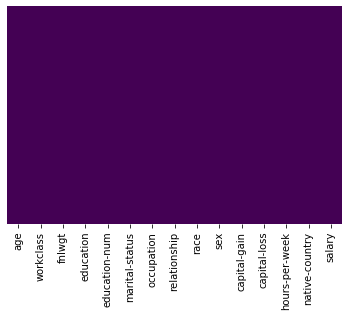

In [10]:
print(sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis'))

In [11]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


In [12]:
df = df.replace('?',np.nan)

changed "?" into nan

AxesSubplot(0.125,0.125;0.775x0.755)


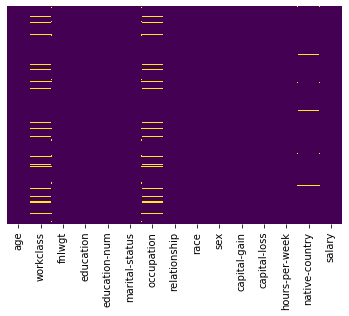

In [13]:
print(sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis'))

In [14]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


In [15]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

### found out things are bad in workclass, occupation, native-country

In [16]:
df.dropna(inplace=True)

In [17]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [18]:
print("Before " +"(32570, 15)")
print("After ", df.shape)

Before (32570, 15)
After  (30171, 15)


## fixing numerical outliers

####  Age < 120 

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  30171.000000  3.017100e+04   30171.000000  30171.000000  30171.000000   
mean      38.449836  1.898250e+05      10.121408   1091.682112     88.517053   
std       13.196100  1.057002e+05       2.549778   7405.265734    404.566855   
min        0.000000  1.376900e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.176225e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.784310e+05      10.000000      0.000000      0.000000   
75%       47.000000  2.376605e+05      13.000000      0.000000      0.000000   
max      205.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week        salary  
count    30171.000000  30171.000000  
mean        40.946969      0.248881  
std         12.084079      0.432372  
min          1.000000      0.000000  
25%         40.000000      0.000000  
50%         40.000000      0.000000  
75%         4

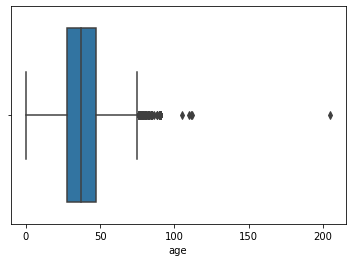

In [19]:
print(df.describe())

sns.boxplot(x=df['age'])

AxesSubplot(0.125,0.125;0.775x0.755)


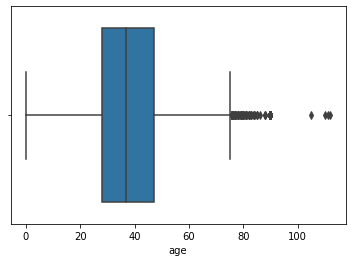

In [20]:
df = df[ df.age < 120 ]
print(sns.boxplot(x=df['age']))

In [21]:
df.shape

(30170, 15)

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  30170.000000  3.017000e+04   30170.000000  30170.000000  30170.000000   
mean      38.444316  1.898229e+05      10.121445   1091.718296     88.519987   
std       13.161434  1.057013e+05       2.549812   7405.385795    404.573239   
min        0.000000  1.376900e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.176202e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.784300e+05      10.000000      0.000000      0.000000   
75%       47.000000  2.376498e+05      13.000000      0.000000      0.000000   
max      112.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week        salary  
count    30170.000000  30170.000000  
mean        40.947000      0.248890  
std         12.084278      0.432377  
min          1.000000      0.000000  
25%         40.000000      0.000000  
50%         40.000000      0.000000  
75%         4

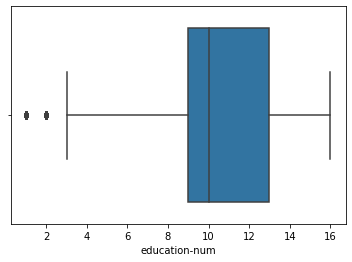

In [22]:
print(df.describe())
sns.boxplot(x=df['education-num'])

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  30170.000000  3.017000e+04   30170.000000  30170.000000  30170.000000   
mean      38.444316  1.898229e+05      10.121445   1091.718296     88.519987   
std       13.161434  1.057013e+05       2.549812   7405.385795    404.573239   
min        0.000000  1.376900e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.176202e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.784300e+05      10.000000      0.000000      0.000000   
75%       47.000000  2.376498e+05      13.000000      0.000000      0.000000   
max      112.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week        salary  
count    30170.000000  30170.000000  
mean        40.947000      0.248890  
std         12.084278      0.432377  
min          1.000000      0.000000  
25%         40.000000      0.000000  
50%         40.000000      0.000000  
75%         4

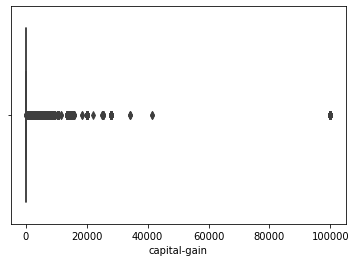

In [23]:
print(df.describe())
sns.boxplot(x=df['capital-gain'])

AxesSubplot(0.125,0.125;0.775x0.755)


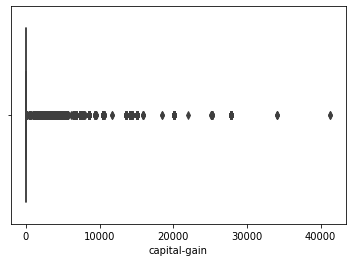

In [24]:

df = df[ df['capital-gain'] < 80000 ]
print(sns.boxplot(x=df['capital-gain']))

In [25]:
df.shape

(30022, 15)

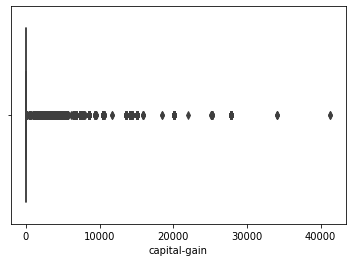

In [26]:
sns.boxplot(x=df['capital-gain'])

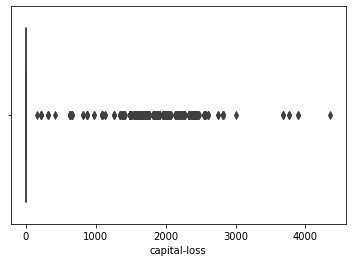

In [27]:
sns.boxplot(x=df['capital-loss'])

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  30022.000000  3.002200e+04   30022.000000  30022.000000  30022.000000   
mean      38.406202  1.898057e+05      10.107321    604.133269     88.956365   
std       13.161438  1.057151e+05       2.542089   2577.795396    405.521401   
min        0.000000  1.376900e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.176060e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.784490e+05      10.000000      0.000000      0.000000   
75%       47.000000  2.376652e+05      12.000000      0.000000      0.000000   
max      112.000000  1.484705e+06      16.000000  41310.000000   4356.000000   

       hours-per-week        salary  
count    30022.000000  30022.000000  
mean        40.901106      0.245187  
std         12.064666      0.430205  
min          1.000000      0.000000  
25%         40.000000      0.000000  
50%         40.000000      0.000000  
75%         4

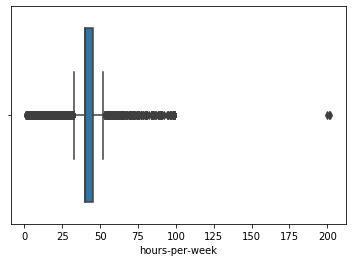

In [28]:
print(df.describe())
sns.boxplot(x=df['hours-per-week'])

AxesSubplot(0.125,0.125;0.775x0.755)


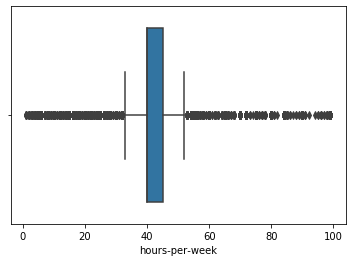

In [29]:
df = df[ df['hours-per-week'] < 125 ]
print(sns.boxplot(x=df['hours-per-week']))

In [30]:
df.shape

(30019, 15)

# Patterns

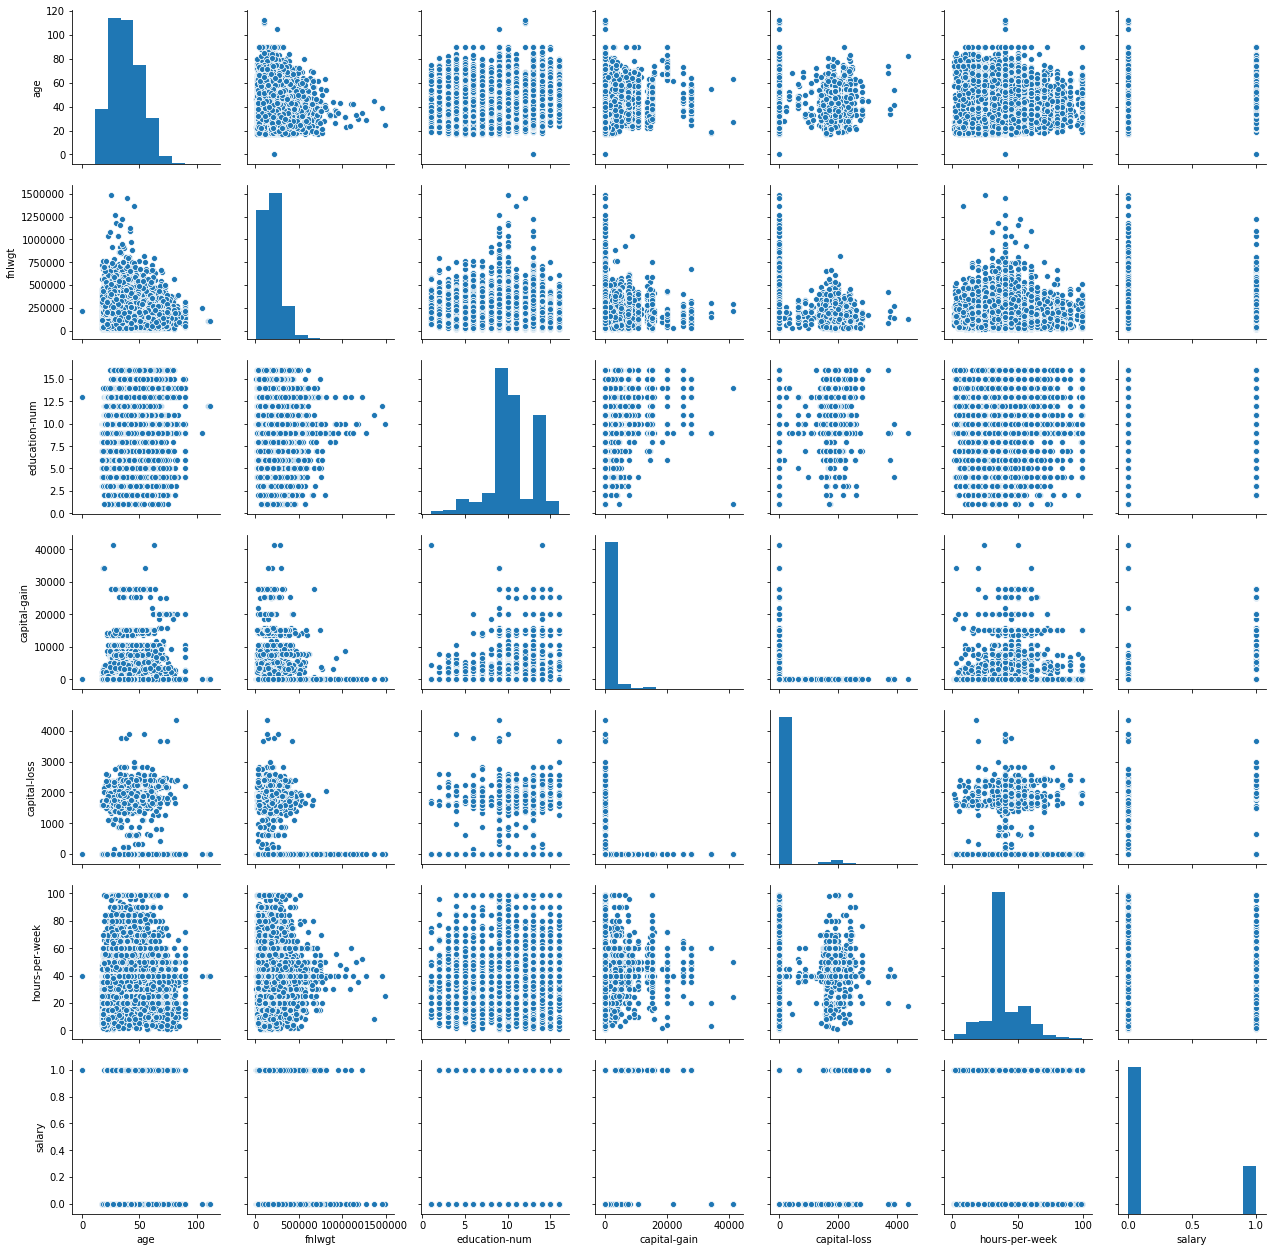

In [31]:
sns.pairplot(df)

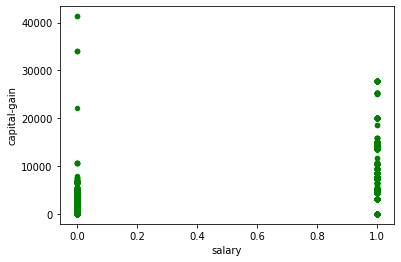

In [32]:
df.plot(kind='scatter',x='salary',y='capital-gain',color='green')
plt.show()

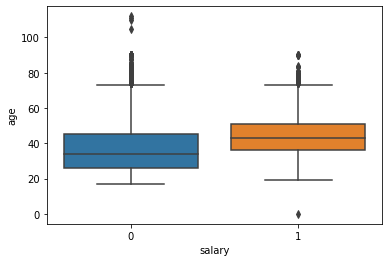

In [33]:
sns.boxplot(x="salary", y="age", data=df)

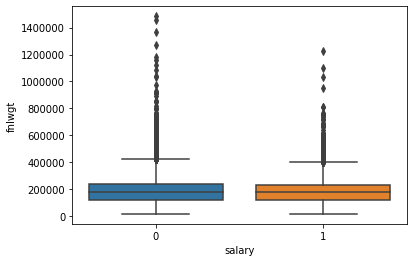

In [34]:
sns.boxplot(x="salary", y="fnlwgt", data=df)

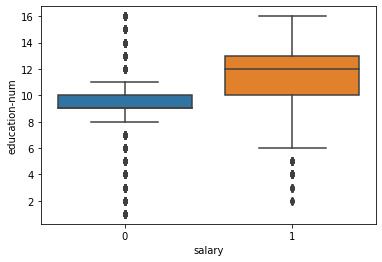

In [35]:
sns.boxplot(x="salary", y="education-num", data=df)

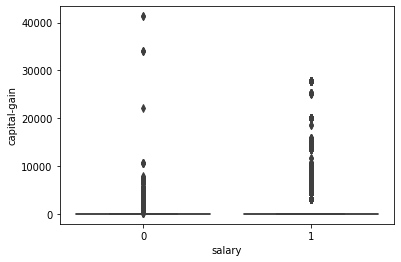

In [36]:
sns.boxplot(x="salary", y="capital-gain", data=df)

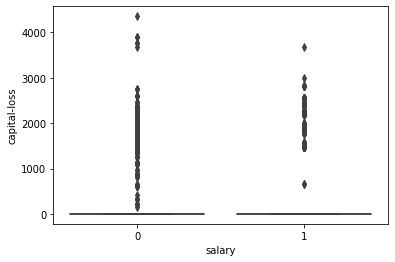

In [37]:
sns.boxplot(x="salary", y="capital-loss", data=df)

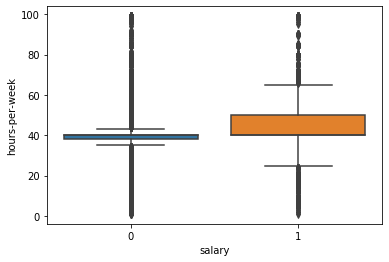

In [38]:
sns.boxplot(x="salary", y="hours-per-week", data=df)

# Now, we start Modeling

In [39]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [40]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32565,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32566,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32567,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32568,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0
32569,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,1


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
df2 = df[['age','education-num', 'salary','hours-per-week','capital-gain','capital-loss']]
df2.head()

,age,education-num,salary,hours-per-week,capital-gain,capital-loss
0,39,13,0,40,2174,0
1,50,13,0,13,0,0
2,38,9,0,40,0,0
3,53,7,0,40,0,0
4,28,13,0,40,0,0


### dummy & cancation

In [42]:
new_occupation = pd.get_dummies(df['occupation'],drop_first=True)
new_workclass = pd.get_dummies(df['workclass'],drop_first=True)
new_education = pd.get_dummies(df['education'],drop_first=True)
new_sex = pd.get_dummies(df['sex'],drop_first=True)

In [49]:
df2_sex = pd.concat([df2,new_education,new_workclass], axis=1)
df2_edu = pd.concat([df2,new_sex,new_occupation], axis=1)

In [50]:
df2_edu.head()

,age,education-num,salary,hours-per-week,capital-gain,capital-loss,Male,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,39,13,0,40,2174,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,50,13,0,13,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,38,9,0,40,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,53,7,0,40,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
4,28,13,0,40,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


# Now, Logistic regression

In [51]:
X_train, X_test, y_train, y_test = train_test_split(df2_edu.drop('salary',axis=1),df2_edu['salary'], test_size=0.25,                                               random_state=101)
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))


              precision    recall  f1-score   support

           0       0.85      0.94      0.89      5677
           1       0.72      0.47      0.57      1828

    accuracy                           0.82      7505
   macro avg       0.78      0.70      0.73      7505
weighted avg       0.81      0.82      0.81      7505

0.8249167221852098


In [52]:
df2.head()

,age,education-num,salary,hours-per-week,capital-gain,capital-loss
0,39,13,0,40,2174,0
1,50,13,0,13,0,0
2,38,9,0,40,0,0
3,53,7,0,40,0,0
4,28,13,0,40,0,0


In [53]:
df2.shape

(30019, 6)

# Decision Tree

In [54]:
modelD = DecisionTreeClassifier()
modelD.fit(X_train,y_train)
modelD = DecisionTreeClassifier(max_depth=8, criterion='gini')
modelD.fit(X_train,y_train)
predictions = modelD.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[5429  248]
 [1009  819]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      5677
           1       0.77      0.45      0.57      1828

    accuracy                           0.83      7505
   macro avg       0.81      0.70      0.73      7505
weighted avg       0.82      0.83      0.82      7505

0.8325116588940706
